In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:

in_file = '/home/connynic/sentimentsVader.tsv'
df = pd.read_table(in_file, header=None, names=["Id", "neg", "pos", "neu", "compound"])
df["compound>0"] = df["compound"] > 0
df["compound_abs"] = abs(df["compound"])
df.head()

,Id,neg,pos,neu,compound,compound>0,compound_abs
0,0,0.049,0.326,0.626,0.9493,True,0.9493
1,1,0.176,0.131,0.693,-0.4215,False,0.4215
2,2,0.066,0.144,0.789,0.5789,True,0.5789
3,3,0.129,0.000,0.871,-0.7964,False,0.7964
4,4,0.000,0.103,0.897,0.5423,True,0.5423


In [3]:
in_file = '../GithubRepos/coder/Experiments/data/qrels.train.tsv'
df_qrels = pd.read_table(in_file, header=None, names=["Qid", "0", "docid", "1"])
df_qrels

,Qid,0,docid,1
0,1185869,0,0,1
1,1185868,0,16,1
2,597651,0,49,1
3,403613,0,60,1
4,1183785,0,389,1
...,...,...,...,...
532756,19285,0,8841362,1
532757,558837,0,4989159,1
532758,559149,0,8841547,1
532759,706678,0,8841643,1


In [4]:
in_file = '../GithubRepos/coder/Experiments/data/queries.in_qrels.train.tsv'
df_query = pd.read_table(in_file, header=None, names=["Qid", "query"])
df_query

,Qid,query
0,121352,define extreme
1,634306,what does chattel mean on credit history
2,920825,what was the great leap forward brainly
3,510633,tattoo fixers how much does it cost
4,737889,what is decentralization process.
...,...,...
502934,155334,do boston ferns have to be in shade
502935,421294,is popcorn a healthy snack
502936,1059728,wholesale lularoe price
502937,210839,how can i watch the day after


In [5]:
in_file = '../GithubRepos/coder/Experiments/data/bm25.top1000.dev.tsv'
df_candidates = pd.read_table(in_file, header=None, names=["Qid", "docid", "rank"])
df_candidates

,Qid,docid,rank
0,2,1782337,1
1,2,1001873,2
2,2,4339075,3
3,2,6285817,4
4,2,3634076,5
...,...,...,...
55544581,1102432,7894412,996
55544582,1102432,8077557,997
55544583,1102432,8146879,998
55544584,1102432,8235529,999


In [12]:
total_size = sum(1 for _ in open(in_file))
df_candidates = np.empty((0, 3))
i = 0
with open(in_file, "r", encoding="utf8") as fr:
        for line in tqdm(fr, total=total_size):
                vals = line.strip().split('\t')
                if len(vals) != 3:
                        print("Failed parsing the line (skipped):\n %s " % line.strip())
                        continue
                if int(vals[2]) <= 10:
                        df_candidates[i,:] = vals
                        i = i+1
                


  0%|          | 0/55544586 [00:00<?, ?it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [11]:
pd.DataFrame(df_candidates)

,0,1,2
0,2.0,1782337.0,1.0
1,2.0,1001873.0,2.0
2,2.0,4339075.0,3.0
3,2.0,6285817.0,4.0
4,2.0,3634076.0,5.0
...,...,...,...
5029385,0.0,0.0,0.0
5029386,0.0,0.0,0.0
5029387,0.0,0.0,0.0
5029388,0.0,0.0,0.0


<Axes: xlabel='compound>0', ylabel='count'>

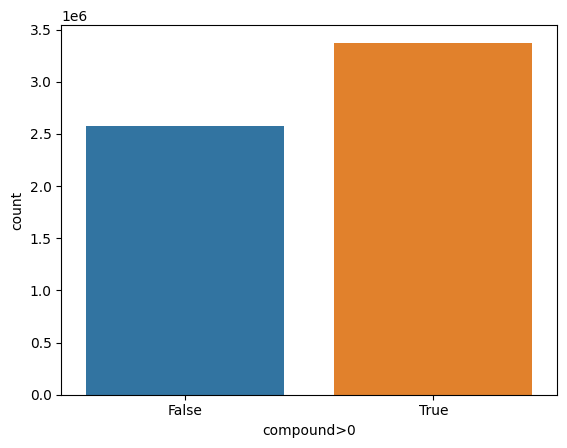

In [31]:
sns.countplot(data = df, x = "compound>0")

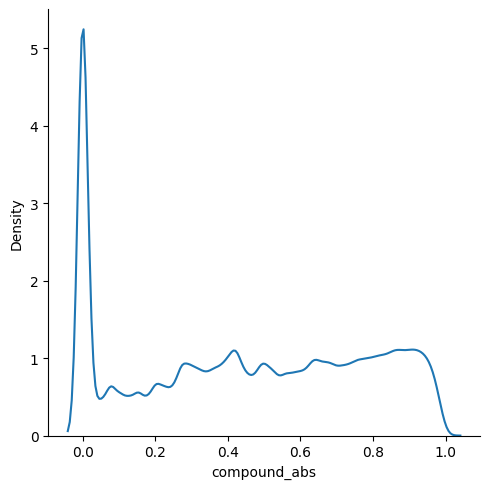

In [55]:
sns.displot(df, x="compound_abs", kind="kde")
#sns.displot(df, x="compound_abs", kind="kde")

In [42]:
df["docinqrel"] = df["Id"].isin(df_qrels["docid"])
df

,Id,neg,pos,neu,compound,compound>0,compound_abs,docinqrel
0,0,0.049,0.326,0.626,0.9493,True,0.9493,True
1,1,0.176,0.131,0.693,-0.4215,False,0.4215,False
2,2,0.066,0.144,0.789,0.5789,True,0.5789,False
3,3,0.129,0.000,0.871,-0.7964,False,0.7964,False
4,4,0.000,0.103,0.897,0.5423,True,0.5423,False
...,...,...,...,...,...,...,...,...
7053878,7053878,0.052,0.217,0.730,0.8860,True,0.8860,False
7053879,7053879,0.000,0.104,0.896,0.8360,True,0.8360,False
7053880,7053880,0.000,0.186,0.814,0.8689,True,0.8689,False
7053881,7053881,0.000,0.165,0.835,0.7579,True,0.7579,False


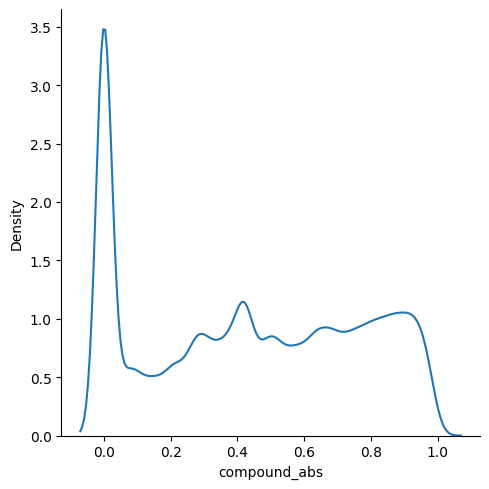

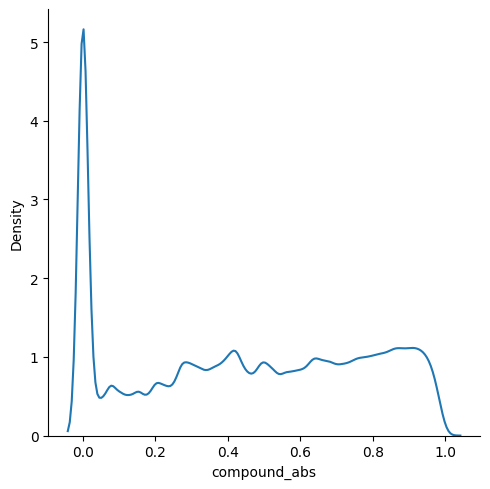

In [56]:
sns.displot(df[df["docinqrel"]==True], x="compound_abs", kind="kde")#, hue = "docinqrel")
sns.displot(df[df["docinqrel"]==False], x="compound_abs", kind="kde")

In [69]:
df_relqueries = df_query[df_query["query"].str.contains("climate change")]

In [70]:
df_relqueries

,Qid,query
15219,1170397,statistic on approximately how many people cou...
29712,634576,what does climate change mean
47041,542768,weather channel founder slams climate change lies
65656,937864,when did climate change start to happen
68638,586613,what causes climate change methane
...,...,...
464340,586598,what causes climate change
477207,515507,the difference between global warming and clim...
486345,301690,how might climate change affect
490047,88670,causes of the climate change
